## Logistic Regression 

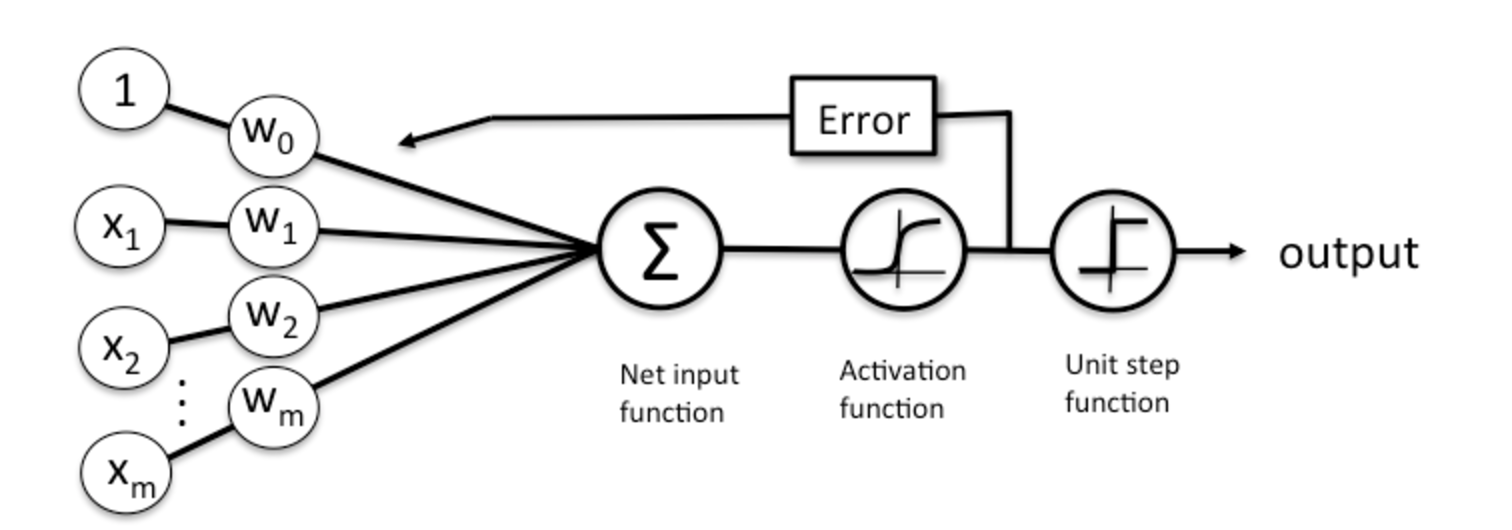

In [4]:
from IPython.display import Image
Image('../sources/log_reg.png')

___ 

The logistic regression equation maps the input to an output ranging between 0 and 1. Y is denoted as the ground truth and X is denoted as the observed features. The sigmoid activation directly regresses the logistic function for the probability $y=1$. Thus the probability of Y=1 and Y=0 is shown below, respectively:

$$ p(y^{(i)}=1\text{ | }x^{(i)},w)=\frac{1}{1+\exp{(w^T x^{(i)}+b})}$$

$$ p(y^{(i)}=0\text{ | }x^{(i)},w)= 1 - \frac{1}{1+\exp{(w^T x^{(i)}+b})}$$

- Where w is the weight vector of features {X1,X2,...X3}, and b is the bias term

- Note that $w^{T}*X$ is a linear combination of the weights and the attributes:  $b + w_{1}x_{1} + w_{2}x_{2} + ....$


____

The goal is to find a set of weights that minimizes a loss function defined over the training data set. The loss function measures the difference between the ground truth label and the predicted class label. If the prediction is very close to the ground truth label, the loss value will be low. On the other hand, if the prediction is far from the true label, the resulting loss will be high. To update the weights, we will use gradient descent. The process is iterative, so we must calculate the gradient every time w is updated.

**Logistic Cost Function **

$$J({\theta}) = -\frac{1}{m}\sum [y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$

- Differentiating the cost function yields the function below:

** Gradient Descent --  Binary Logistic Regression:** 

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\sum_{i=1}^M (y^{(i)}-g(x^{(i)}))x^{(i)}_j}_{\text{gradient}} $$

**Where:**

- η: learning rate
- g(⋅): sigmoid function or "logistic function" : $sigmoid = \frac{1}{1+\exp(-t)}$
- $y^{(i)}$: instance of the target
- $ŷ^{(i)}$: an instance of the prediction (for the current value of w)
- $x_{j}^{(i)}$ is the $i^{th}$ instance of the input with the $j^{th}$ feature (that is, the feature in row i and column j)

The dot product of $w^T x^{(i)}$ results in a scalar. Multiplying $w$ and $x^{(i)}$ together returns a single value. Next, place the single value through the sigmoid activation function to compute the probability that $y=1$. 

$$ \hat{y}^{(i)} = 1$$
$$\text{if:    } p(y^{(i)}=1\text{ | }x^{(i)},w) > 0.5  $$ 
$$ \hat{y}^{(i)} = 0  \text{      otherwise} $$

In [318]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
class Logistic_Regression(object):
    
    """Logistic Regression
    
    
    Keyword arguments:
    eta -- Learning rate (between 0.0 and 1.0)
    n_iter -- Number of passes over the training set
    """
    
    def __init__(self,lr,iterations):
        
        self.learning_rate = lr
        self.iters = iterations

    def sigmoid(self,z):
        
        """ Logistic Sigmoid Function """
        sigmoid = 1 / (1+np.exp(-z))
        return(sigmoid)
    
    def activation(self,X):
        
        """Activation of Logistic Neuron -- Returns Scalar Value"""
        z = np.dot(X,self.weights)
        return(self.sigmoid(z))
    
    def add_bias(self,X):
        
        """ Bias Vector Initialized at Zero with X Features"""        
        return(np.hstack([np.ones((X.shape[0],1)),X]))

    def predict_prob(self,X,alpha=0.50,add_bias=True):
        
        """ Predicted Class Label"""
    
        Xb = self.add_bias(X) if add_bias else X
        pred = np.where(self.activation(Xb) >= alpha,1,0)
        return(pred)
        
    def gradient(self,X,y):
        
        """Compute Gradient"""
        gradient = np.ones(self.weights.shape)
        for x_i,y_i in zip(X,y):
            g = (y_i - self.predict_prob(x_i,add_bias=False))*x_i
            gradient += g.reshape(self.weights.shape)
        return(gradient/float(len(y)))

    def fit(self,X,y):
        
        """Fit Model to Training Set"""
        
        print('Original Data Shape: ',X.shape)
        
        #Initialize Weights
        X_bias = self.add_bias(X)
        
        num_obs, num_feats = X_bias.shape
        print('Data with Bias Term: ',X_bias.shape)
        
        #Weights
        self.weights = np.zeros((num_feats,1))
        print('Weight Vector Shape: ',self.weights.shape)
    
        #Iterate and Update Weights
        for i in range(self.iters):

            #Compute Gradient
            gradient = self.gradient(X_bias,y)
            
            #Update Weights
            self.weights += gradient*self.learning_rate

In [275]:
def get_data():
    
    """ Load Data -- Iris Dataset"""
    
    X = pd.DataFrame(datasets.load_iris().data,columns=[datasets.load_iris().feature_names])
    y = pd.DataFrame(datasets.load_iris().target,columns=['Species'])

    data = pd.concat([X,y],axis=1)
    data['Species'] = np.where(data['Species'].astype(int) >=1,1,0)
    
    X = data.ix[:,:-1]
    y = data.ix[:,-1]

    return(X,y)

In [286]:
if __name__ == '__main__':
    
    #Get Data
    X,y = get_data()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70)
    
    print(y_test.shape)

    #Instantiate Logistic Regression Classifier
    clf = Logistic_Regression(lr=0.50,iterations=100)
    
    #Fit Model w/ Training Data
    clf.fit(X_train, y_train)
    
    #Make Predictions
    ypred = clf.predict_prob(X_test)

    # #Accuracy Score
    print('Accuracy Score: {0:.4f}'.format(accuracy_score(ypred,y_test)))

(45,)
Original Data Shape:  (105, 4)
Data with Bias Term:  (105, 5)
Weight Vector Shape:  (5, 1)
Accuracy Score: 1.0000


### Comparing Model with Scikit Learn

In [287]:
from sklearn.linear_model import LogisticRegression

clf_skl = LogisticRegression()
clf_skl.fit(X,y)

#Make Predictions
yhat_skl = clf_skl.predict(X)

#Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(yhat_skl,y)))

Accuracy Score: 1.0


## Linear Regression

- To predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formulas:


- $\hat{Y}=w^Tx^{(i)}$ -- returns a scalar value


- Where $x$ is a matrix with example instances in each instance of the matrix. 


- Objective is to minimize cost function -- "sum squared error": 

$$J(w) = \frac{1}{2}\sum_i(y - w^Tx^{(i)})^2$$

- In matrix notation, the cost function is: 

$$J(w) = \frac{1}{2}(xw-y)^{T}(xw-y)$$

- Differentiating J(w):

$$gradient = 2*\frac{1}{2}x^{T}(xw - y) = 0$$

- Formula for calculating the optimal values of the regression weights:

$$ w = (X^TX)^{-1}X^Ty $$

- Where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$


In [289]:
def linreg(X,y):
    
    #Append Bias Vector to Featues
    bias = np.ones([len(X),1])
    
    X = np.hstack([X,bias])
    
    #Optimization function to compute W
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))
    
    #Predicted Value:
    yhat = np.dot(np.transpose(w),np.transpose(X))
    
    #MSE:
    print('Mean Squared Error: {0:.4f}'.format(np.mean((y-yhat)**2)))
                    
linreg(X,y)

Mean Squared Error: 0.0206


In [290]:
reg = LinearRegression()
reg.fit(X,y)
pred = reg.predict(X)
print('Sklearn Mean Squared Error: {0:.4f}'.format(mean_squared_error(pred,y)))

Sklearn Mean Squared Error: 0.0206


### Linear Regression with Gradient Descent

In [316]:
class Linear_Regression(object):
    
    """Linear Regression
    
    
    Keyword arguments:
    eta -- Learning rate (between 0.0 and 1.0)
    n_iter -- Number of passes over the training set
    """
    
    def __init__(self,lr,iterations=1):
        
        self.learning_rate = lr
        self.iters = iterations
        
    def add_bias(self,X):
        
        """ Bias Vector Initialized at Zero with X Features"""        
        return(np.hstack([np.ones((X.shape[0],1)),X]))

    def predict_prob(self,X,alpha=0.50,add_bias=True):
        
        """ Predicted Class Label"""
    
        Xb = self.add_bias(X) if add_bias else X
        return(np.dot(Xb,self.weights))
        
    def gradient(self,X,y):
        
        """Compute Gradient"""
        gradient = np.ones(self.weights.shape)
        for x_i,y_i in zip(X,y):
            g = (y_i - self.predict_prob(x_i,add_bias=False))*x_i
            gradient += g.reshape(self.weights.shape)
        return(gradient/float(len(y)))

    def fit(self,X,y):
        
        """Fit Model to Training Set"""
        
        print('Original Data Shape: ',X.shape)
        
        #Initialize Weights
        X_bias = self.add_bias(X)
        
        num_obs, num_feats = X_bias.shape
        print('Data with Bias Term: ',X_bias.shape)
        
        #Weights
        self.weights = np.zeros((num_feats,1))
        print('Weight Vector Shape: ',self.weights.shape)
    
        #Iterate and Update Weights
        for i in range(self.iters):

            #Compute Gradient
            gradient = self.gradient(X_bias,y)
            
            #Update Weights
            self.weights += gradient*self.learning_rate

In [317]:
if __name__ == '__main__':
    
    #Get Data
    X,y = get_data()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70)

    #Instantiate Logistic Regression Classifier
    reg = Linear_Regression(lr=0.10)
    
    #Fit Model w/ Training Data
    reg.fit(X_train, y_train)
    
    #Make Predictions
    ypred = reg.predict_prob(X_test)

    # #Accuracy Score
    print('MSE: {0:.4f}'.format(mean_squared_error(ypred,y_test)))

Original Data Shape:  (105, 4)
Data with Bias Term:  (105, 5)
Weight Vector Shape:  (5, 1)
MSE: 14.0680


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X,y)
pred = reg.predict(X)
print('Sklearn Mean Squared Error: {0:.4f}'.format(mean_squared_error(pred,y)))